<a href="https://colab.research.google.com/github/anonymous-2005/Movie-recommendation-system/blob/main/Movie_recommender_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv
Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [3]:
import io
credits_df= pd.read_csv(io.BytesIO(uploaded['tmdb_5000_credits.csv']))
movies_df = pd.read_csv(io.BytesIO(uploaded['tmdb_5000_movies.csv']))

In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
credits_df.columns=['id', 'title', 'cast', 'crew' ]
movies_df=movies_df.merge(credits_df, on="id")
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

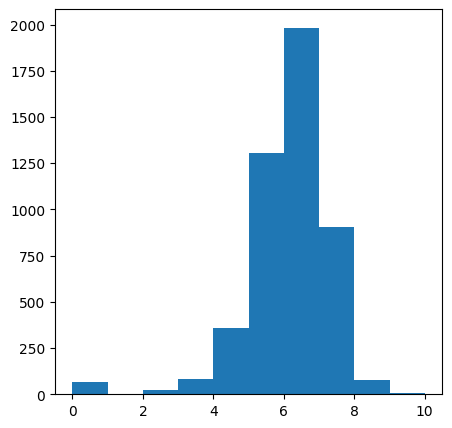

In [8]:
plt.figure(figsize=(5,5))
plt.hist(movies_df['vote_average'])
plt.show()

In [9]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


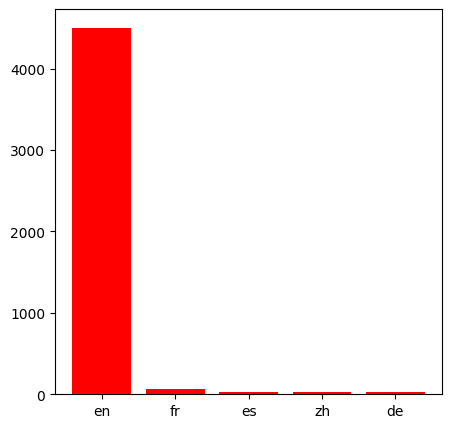

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(movies_df['original_language'].value_counts()[0:5].keys()),list(movies_df['original_language'].value_counts()[0:5]),color="r")
plt.show()

building the model

In [11]:
from ast import literal_eval
features = ["cast", "crew", "keywords", "genres"]
for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)
movies_df[features].head(10)
#converts string data into usable data

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
5,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...","[{'id': 851, 'name': 'dual identity'}, {'id': ...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na..."
6,"[{'cast_id': 34, 'character': 'Flynn Rider (vo...","[{'credit_id': '52fe46db9251416c91062101', 'de...","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
7,"[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...","[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
8,"[{'cast_id': 3, 'character': 'Harry Potter', '...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...","[{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
9,"[{'cast_id': 18, 'character': 'Bruce Wayne / B...","[{'credit_id': '553bf23692514135c8002886', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 7002...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [12]:

def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan
    #a function made to get the directors name

In [13]:
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
    #returns the top 3 elements or the entire list whichever is more.

In [14]:
movies_df["director"] = movies_df["crew"].apply(get_director)
features = ["cast", "keywords", "genres"]
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)
    #applying both the functions

In [15]:
movies_df[['original_title', 'cast', 'director', 'keywords', 'genres']].head(10)

,original_title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Tobey Maguire, Kirsten Dunst, James Franco]",Sam Raimi,"[dual identity, amnesia, sandstorm]","[Fantasy, Action, Adventure]"
6,Tangled,"[Zachary Levi, Mandy Moore, Donna Murphy]",Byron Howard,"[hostage, magic, horse]","[Animation, Family]"
7,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",Joss Whedon,"[marvel comic, sequel, superhero]","[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",David Yates,"[witch, magic, broom]","[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Ben Affleck, Henry Cavill, Gal Gadot]",Zack Snyder,"[dc comics, vigilante, superhero]","[Action, Adventure, Fantasy]"


In [16]:
def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace(" ", ""))
        else:
            return ""
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)
    #to convert the above feature instances into lowercase and remove all the spaces between them.

In [17]:
def create_soup(features):
    return ' '.join(features['keywords']) + ' ' + ' '.join(features['cast']) + ' ' + features['director'] + ' ' + ' '.join(features['genres'])
movies_df["soup"] = movies_df.apply(create_soup, axis=1)
print(movies_df["soup"].head())
#create a “soup” containing all of the metadata information extracted to input into the vectorizer.

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object


In [18]:
 from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity as cosine_similarity
count_vectorizer = CountVectorizer(stop_words="english")
count_matrix = count_vectorizer.fit_transform(movies_df["soup"])
print(count_matrix.shape)
similarity = cosine_similarity(count_matrix, count_matrix)
print(similarity.shape)
indices = pd.Series(movies_df.index, index=movies_df['original_title'])
#As the name suggests, CountVectorizer counts the frequency of each word and outputs a 2D vector containing frequencies.
#We don’t take into account the words like a, an, the (these are called “stopwords”) because these words are usually present in higher amounts in the text and don’t make any sense.
#There exist several similarity score functions such as cosine similarity, Pearson correlation coefficient, etc. Here, we use the cosine similarity score as this is just the dot product of the vector output by the CountVectorizer.

(4803, 11520)
(4803, 4803)


In [19]:
indices = pd.Series(movies_df.index, index=movies_df["original_title"]).drop_duplicates()
print(indices.head())
#Create a reverse mapping of movie titles to indices. By this, we can easily find the title of the movie based on the index.

original_title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64


In [22]:
def movies_recommendation(title, cosine_similarity):
    idx = indices[title]
    similarity_scores = list(enumerate(cosine_similarity[idx]))
    similarity_scores= sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores= similarity_scores[1:11]
    # (a, b) where a is id of movie, b is similarity_scores
    movies_indices = [ind[0] for ind in similarity_scores]
    movies = movies_df["original_title"].iloc[movies_indices]
    return movies

#The get_recommendations() function takes the title of the movie and the similarity function as input. It follows the below steps to make recommendations.
#Get the index of the movie using the title.
#Get the list of similarity scores of the movies concerning all the movies
#Enumerate them (create tuples) with the first element being the index and the second element is the cosine similarity score.
#Sort the list of tuples in descending order based on the similarity score.
#Get the list of the indices of the top 10 movies from the above sorted list. Exclude the first element because it is the title itself.
#Map those indices to their respective titles and return the movies list.
print ("The Avengers")
print(movies_recommendation("The Avengers", similarity))


Avengers: Age of Ultron
7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: original_title, dtype: object


The model uses the "cast", "keywords", "director", and "genres" data from the movie information to build a "soup" string for each movie, which is then used as the input for a bag-of-words model. The bag-of-words model is trained using the CountVectorizer class from scikit-learn, and the resulting matrix of word counts is used to compute the cosine similarity between the movies using the cosine_similarity function from scikit-learn.

Finally, the recommendation system is implemented using the movies_recommendation function, which takes a movie title and a similarity matrix as input and returns a list of recommended movies based on the similarity between the input movie and the other movies in the dataset.

Overall, the code is using a combination of feature engineering, natural language processing, and collaborative filtering to build a movie recommendation system. It is an example of a machine learning model.





